In [ ]:
import numpy as np
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras import optimizers
from keras import regularizers
from keras.utils import to_categorical
from keras.utils.vis_utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score,accuracy_score,recall_score,confusion_matrix

## Data Preprocessing

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
x_train = x_train.astype('float32') /255
x_test = x_test.astype('float32') /255
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)
# Mean normalization
mean = np.mean(x_train, axis=0)
x_train -= mean
x_test -= mean

In [ ]:
print(x_train.shape[-3:],y_train.shape)

(32, 32, 3) (50000, 100)


## Building the Model

In [ ]:
def create_model():
    model = Sequential()

    model.add(Conv2D(64, (3, 3), padding='same',
                      input_shape=x_train.shape[-3:],kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('elu'))

    model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('elu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('elu'))
    # model.add(Dropout(0.3))

    model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('elu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('elu'))
    model.add(Dropout(0.3))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('elu'))
    model.add(Dropout(0.4))

    model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('elu'))

    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('elu'))
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('elu'))
    model.add(Dropout(0.4))

    model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('elu'))

    model.add(MaxPool2D(pool_size=(2, 2)))
    # model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(512,kernel_regularizer=regularizers.l2(0.001)))
    model.add(Activation('elu'))

    model.add(Dropout(0.4))
    model.add(Dense(100))
    model.add(Activation('softmax'))
    return model

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_144 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_145 (Activation)  (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_48 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 16, 16, 128)       73856     
_________________________________________________________________
activation_146 (Activation)  (None, 16, 16, 128)     

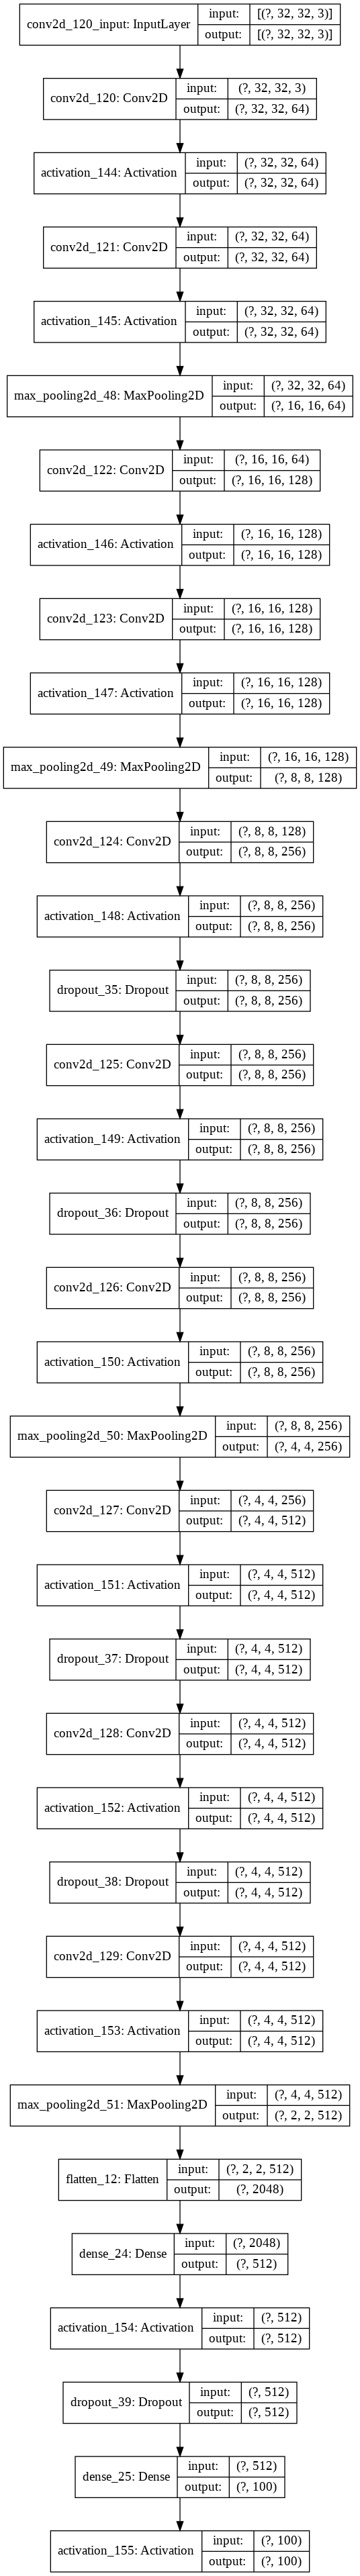

In [ ]:
model = create_model()
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Learning rate 0.035 gave best results with decay 1e-5, accuracy dropped when lr/decay was increased
sgd = optimizers.SGD(lr=0.035, decay=1e-5,momentum=0.8) #epochs=150
adam = optimizers.Adam(lr=0.001, decay = 1e-3,clipvalue=0.5) #epochs=80
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',min_delta=0.0001,patience=3,mode='max')
checkpoint_path = "VGGNet16_ADAM_Dropouts"
best_model = ModelCheckpoint(filepath = checkpoint_path, save_best_only=True,save_weights_only=True, monitor='val_accuracy', mode='max')
# batch size to 128 for best accuracy, it decreases if batch size is increased
history = model.fit(x_train, y_train,
                    batch_size= 128,
                    epochs=80,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping,best_model],verbose=2)

Epoch 1/80
391/391 - 20s - loss: 5.5378 - accuracy: 0.0939 - val_loss: 4.2125 - val_accuracy: 0.1881
Epoch 2/80
391/391 - 20s - loss: 4.0086 - accuracy: 0.2010 - val_loss: 3.6064 - val_accuracy: 0.2678
Epoch 3/80
391/391 - 20s - loss: 3.5245 - accuracy: 0.2848 - val_loss: 3.3159 - val_accuracy: 0.3280
Epoch 4/80
391/391 - 19s - loss: 3.2369 - accuracy: 0.3392 - val_loss: 3.0832 - val_accuracy: 0.3766
Epoch 5/80
391/391 - 19s - loss: 3.0257 - accuracy: 0.3895 - val_loss: 2.9312 - val_accuracy: 0.4141
Epoch 6/80
391/391 - 19s - loss: 2.8576 - accuracy: 0.4281 - val_loss: 2.8356 - val_accuracy: 0.4392
Epoch 7/80
391/391 - 20s - loss: 2.7246 - accuracy: 0.4595 - val_loss: 2.7355 - val_accuracy: 0.4592
Epoch 8/80
391/391 - 19s - loss: 2.5939 - accuracy: 0.4899 - val_loss: 2.6702 - val_accuracy: 0.4818
Epoch 9/80
391/391 - 19s - loss: 2.4814 - accuracy: 0.5171 - val_loss: 2.6716 - val_accuracy: 0.4816
Epoch 10/80
391/391 - 19s - loss: 2.3818 - accuracy: 0.5457 - val_loss: 2.6338 - val_accura

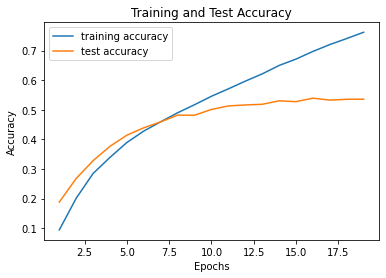

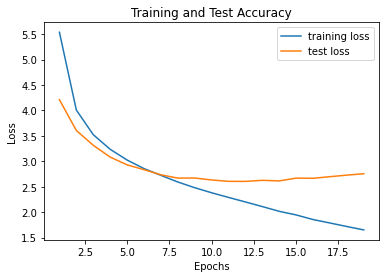

In [ ]:
#plot Accuracy vs epochs
train_metrics = history.history['accuracy']
val_metrics = history.history['val_accuracy']
epochs = range(1, len(train_metrics) + 1)
plt.plot(epochs, train_metrics)
plt.plot(epochs, val_metrics)
plt.title('Training and Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["training accuracy", 'test accuracy'])
plt.show()
#plot Validaiton loss vs epochs
train_metrics = history.history['loss']
val_metrics = history.history['val_loss']
plt.plot(epochs, train_metrics)
plt.plot(epochs, val_metrics)
plt.title('Training and Test Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["training loss", 'test loss'])
plt.show()

In [ ]:
model = create_model()
# checkpoint_path = "../weights/VGGNet16_ADAM_Dropouts"
checkpoint_path = "VGGNet16_ADAM_Dropouts"
model.load_weights(checkpoint_path)
# loss,acc = model.evaluate(x_test,  y_test, verbose=2)
# print('Test Accuracy:', acc)
prediction = model.predict(x_test).argmax(-1)
cm = confusion_matrix(y_test.argmax(axis=1), prediction)
np.set_printoptions(threshold=5000)
print(cm)
precision = precision_score(y_test.argmax(axis=1), prediction, average='weighted')

accuracy= accuracy_score(y_test.argmax(axis=1), prediction)
recall= recall_score(y_test.argmax(axis=1), prediction, average='weighted')

print('precision:', precision)
print('accuracy:', accuracy)
print('recall:', recall)
print('Used Activation elu because using relu model was training very very slowly and with a larger variance')

[[79  1  1 ...  0  1  0]
 [ 0 69  0 ...  0  0  0]
 [ 0  1 43 ...  1  5  0]
 ...
 [ 0  0  1 ... 59  0  0]
 [ 0  0  8 ...  0 23  1]
 [ 1  0  2 ...  0  0 53]]
precision: 0.5459658080509019
accuracy: 0.5393
recall: 0.5393
Used Activation elu because using relu model was training very very slowly and with a larger variance
